*Pontificia Universidad Católica de Chile*

*Instituto de Ingeniería Matemática y Computacional*

*Magister en Inteligencia Artificial - MIA*

#**Tarea 1**

##**Fundamentos Matemáticos para la Inteligencia Articial**
##**IMT3850 2022**

Profesor: Manuel A. Sánchez

Alumno: Ronald Castillo Capino

##**Preguntas**

1. (5 puntos) Normas.
Demuestre la siguiente identidad de acuerdo a las deficiones vistas en la clase 1,

$$rms(x)^2 = avg(x)^2 + std(x)^2$$

**Dem:** Por definicion de *avg* y *std*, se tiene que:

* $$rms(x)=\sqrt{\sum_{i=1}^n \frac{x_i^2}{n}}$$
* $$avg(x)=\sum_{i=1}^n \frac{x_i}{n}$$
* $$std(x)=\sqrt{\sum_{i=1}^n \frac{(x_i-avg(x))^2}{n}}$$

Desarrollando estos 2 ultimos y aplicando cuadrado de binomio se tiene que:
$$std(x)^2=\sum_{i=1}^n \frac{x_i^2-2x_iavg(x)+avg(x)^2}{n}$$

Pero como *avg* es constante para la sumatoria, implica que:




2. (15 puntos) __Aplicacion de algoritmo k-means__

Este problema trataremos el problema de clustering,
es decir, determinar los k representates de un conjunto de datos y las etiquetas de estos que minimizan
la distancia de cada cluster a su representante.

a) Programe el algortimo de k-means. Construya una rutina

> __k_means_fit(X, Z0, NITERMAX)__

donde __X__ son los datos __Z0__ son los representates iniciales, y __NITERMAX__ es el número máximo de
iteraciones.

b) Use la base de datos datakmeans.csv para testear su algoritmo con k = 5 representantes. Graque el conjunto de datos X por etiqueta y los representates de cada cluster. Graque el comportamiento de la función respecto al número de iteraciones y discuta el número de iteraciones adecuado para
el clustering.

c) Use la base de datos de imágenes de dígitos de MNIST para testear su algoritmo con k = 20 representantes. Graque cada representante y uno de los datos asignados a dicho cluster. Graque el comportamiento de la función objetivo $J^{clust}$ versus al número de iteraciones y discuta el numero de iteraciones adecuado para el clustering.

d) Discuta porque el algoritmo de k − means converge, es decir, es seguro que de una iteración a la
siguiente la función objetivo decrece?

a) Respuesta:

In [2]:
import numpy as np
import pandas as pd
def assign_centroid(data, centroids):  
  centroid_assign = []
  centroid_errors = 0
  for k in range(data.shape[0]):
    errors=((centroids-data.iloc[k])**2).sum(1).values
    centroid_error=np.amin(errors)
    closest_centroid=np.where(errors<=centroid_error)[0].tolist()[0]
    centroid_assign.append(closest_centroid)
    centroid_errors+=centroid_error
  return (centroid_assign,centroid_errors)

def k_means_fit(X,Z0,NITERMAX):
  error = []
  #criterio de parada
  stop=True
  for i in range(NITERMAX):
    # clusters y error
    if 'centroid' in X.columns:
      Y=X.drop(columns=['centroid'])
    else:
      Y=X
    X['centroid'], iter_error = assign_centroid(Y,Z0)
    error.append(iter_error)
    # recalcula centroides
    Z0 = X.groupby('centroid').agg('mean').reset_index(drop = True)
    if len(error)>1 and (error[-1]>=error[-2]) and stop:
      break
  return (X['centroid'], error, Z0)

b) Respuesta:

In [3]:
import pandas as pd 
X=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/tarea 1/datakmeans.csv')
X.rename(columns={'0':'x','1':'y'},inplace=True)
arr = np.arange(X.shape[0])
np.random.shuffle(arr)
Z0=X.iloc[arr[:5]]
A,S,D=k_means_fit(X,Z0,100)

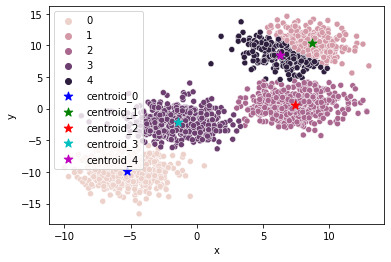

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=X, x='x', y='y', hue=X['centroid'])
for i, k in enumerate(['b','g','r','c','m']):
  plt.scatter(D.loc[i,'x'],D.loc[i,'y'],marker='*',c=k,s=80,label=f"centroid_{i}")
plt.legend()
plt.show()

Como se ve en la tabla y la grafica acontinuacion, el error de los centroides no baja más alla de las 7 iteraciones.

In [5]:
pd.Series(S).to_frame()

,0
0,42287.191283
1,20589.089742
2,14301.024270
3,11975.642314
4,11860.599777
5,11856.747018
6,11854.185469
7,11852.759014
8,11849.060435
9,11846.208516


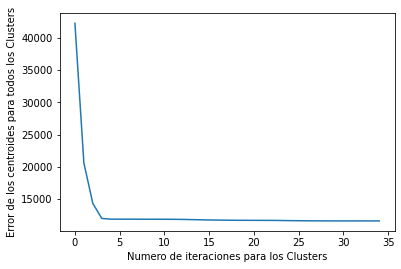

In [6]:
plt.plot(range(len(S)),S)
plt.xlabel("Numero de iteraciones para los Clusters")
plt.ylabel("Error de los centroides para todos los Clusters")
plt.show()

Esto puede ocurrir por la cantidad de iteraciones depende de la cantidad de clusters que hay.

c) Respuesta:

In [7]:
X=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/tarea 1/mnist.csv')
X.drop(columns=X.columns[X.sum(0)==0].tolist()+['label'],inplace=True)
arr = np.arange(X.shape[0])
np.random.shuffle(arr)
Z0=X.iloc[arr[:20]]
A,S,D=k_means_fit(X,Z0,100)

Se puede apreciar tanto en la tabla como en el grafico siguiente,  que las iteraciones no varian despues de las 40 iteraciones.

In [8]:
pd.Series(S).to_frame('J^{clust}')

,J^{clust}
0,3.992418e+10
1,2.492714e+10
2,2.398674e+10
3,2.357485e+10
4,2.336993e+10
5,2.323793e+10
6,2.315795e+10
7,2.310216e+10
8,2.305186e+10
9,2.300283e+10


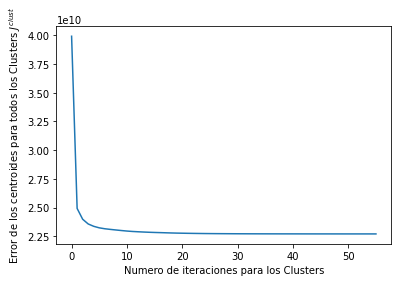

In [9]:
plt.plot(range(len(S)),S)
plt.xlabel("Numero de iteraciones para los Clusters")
plt.ylabel("Error de los centroides para todos los Clusters $J^{clust}$")
plt.show()

d) Respuesta:

Este algoritmo converge, por que va tomando puntos de equilibrio, donde la funcion objetivo $J^{clust}$, definida como:

$$J^{clust}=\frac{1}{2}\sum_{j=1}^n \sum_{i \in C_j} \|x_i-c_j\|_2^2$$

Es una funcion cuadratica, que se puede reescribir como:

$$J^{clust}=\frac{1}{2}\sum_{j=1}^n \sum_{i \in C_j} (c_j-x_i)^TI(c_j-x_i)$$

Con gradiente de la forma para cada $c_j$:

$$\nabla_{c_j}J^{clust}=\sum_{i \in C_j} I(c_j-x_i)$$

Y la matriz __Hesiana__ es de la forma:

$$\nabla_{c_j}^2J^{clust}=\sum_{i \in C_j} I$$

Donde $I$ corresponde a la matriz identidad, por lo que es definida positiva, para todo $c_j$, por lo tanto esta funcion $J^{clust}$ tiene un minimo, por lo que tiene que converger en:

$$\Rightarrow\nabla_{c_j}J^{clust}=0$$
$$\Rightarrow\sum_{i \in C_j} I(c_j-x_i)=0$$
$$\Rightarrow c_j \sum_{i \in C_j} 1= \sum_{i \in C_j}x_i$$
$$\Rightarrow c_j |C_j|= \sum_{i \in C_j}x_i$$
$$\Rightarrow c_j=\frac{1}{|C_j|} \sum_{i \in C_j}x_i$$

Donde $|C_j|$ corresponde a la cardinalidad de puntos que pertenece al cluster $C_j$. Como la matriz Hessiana no depende de $c_j$ y es constantemente positiva, se puede decir que este minimo es un minimo global.

3. (5 puntos) __Independencia lineal__

Considere una matriz de $A \in \mathbb{R}^{m \times n}$, con $m \gt n$ y un vector $b \in \mathbb{R}^m$. Buscamos el vector solución $x \in \mathbb{R}^n$
del sistema lineal $Ax = b$. Describa como puede asegurar de forma práctica si la solución del sistema existe o no.

__Respuesta:__

El sistema lineal, tiene solucion, siempre que la matriz $A$ tenga columnas linealmente independientes entre sí. 

4. (15 puntos) __Clasicador binario: Perceptrón__

En este problema trataremos el problema de clasicación binaria, es decir, determinar si un dato pertenece
a una de dos clases.
a) Programe el algoritmo del Perceptrón. Puede ser útil construir en este caso una rutina

>__Perceptron_fit(X, y, nitmax, eta)__

que tome los datos __X__, sus etiquetas __y__, y que retorne los pesos __w__ del clasicador. Otros hiperparámetros a considerar son __nitmax__ y __eta__ que corresponden respectivamente al número máximo de iteraciones del algoritmo y el learning rate.

b) Programe una rutina que dado un vector de pesos w, y un conjunto de datos X prediga en a que
conjunto de datos pertenece cada dato.

c) Programe una rutina que dado un vector de pesos w, un conjunto de datos X y sus etiquetas y,
entregue un score de que tan bien clasicados están los datos según las predicciones hechas por el
clasicador.

d) Use las bases de datos datos1.csv y datos2.csv, graque los datos identicando sus respecti-
vas etiquetas y junto a ellos el resultado del hiperplano separador obtenido por su algoritmo de Perceptrón.

e) Cree 10 nuevos datos de la siguiente forma:

```
numpy.random.seed(18)
new_data = numpy.random.random(size = (10, 2))
new_data_labels = numpy.random.randint(2, size = 10)
```

Para el primer set de datos, prediga la clase a la que pertenecen cada uno de sus datos con la
función de predicción creada y calcule el score. Graque estos datos junto al conjunto inicial de
datos y discuta la capacidad predictora de este clasicador.

a) Respuesta:

In [10]:
import numpy as np
def Perceptron_fit(X, y, nitmax, eta):
  m,n=X.shape
  y=np.zeros(1,n)
  for i in range(nitmax):
    X*y


def perceptron(X, y,  nitmax, eta):
    
  m, n = X.shape
  theta = np.zeros((n+1,1))
  n_miss_list = []
  # Training.
  for epoch in range(nitmax):
    n_miss = 0
    for idx, x_i in enumerate(X):
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)      
      y_hat = np.sign(np.max(np.dot(x_i.T, theta),0))
      if (np.squeeze(y_hat) - y[idx])!= 0:
        theta += eta*((y[idx] - y_hat)*x_i)
        n_miss += 1
    n_miss_list.append(n_miss)
  return theta, n_miss_list

b) Respuesta:

In [11]:
import numpy as np
X = np.random.random(size = (10, 2))
w = np.random.random(size = 10)
theta, n_miss_list=perceptron(X, w,  100, 10**-2)

c) Respuesta:

d) Respuesta:

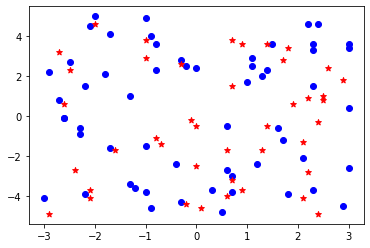

In [12]:
d1=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/tarea 1/data1.csv')
d2=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/tarea 1/data2.csv')
theta1, n_miss_list1=perceptron(d1[['x','y']].values,d1['label'].values,  100, 10**-2)
theta2, n_miss_list2=perceptron(d2[['x','y']].values,d2['label'].values,  100, 10**-2)

import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(d2.loc[d2.label==0,'x'],d2.loc[d2.label==0,'y'],marker='o',c='b')
plt.scatter(d2.loc[d2.label==1,'x'],d2.loc[d2.label==1,'y'],marker='*',c='r')
plt.show()

In [13]:
theta1

array([[ 0.12 ],
       [ 0.035],
       [-0.009]])

5. (5 puntos) __Descomposición en valores singulares.__

Muestre que para  $A \in \mathbb{R}^{m \times n}$ con valores singulares $\sigma_1, ..., \sigma_p$, $p = \min(m,n)$, su norma esta dada por:

$$\|A\|_F=\sqrt{\sigma_1^2+....+\sigma_p^2}$$



__Respuesta:__
La definicion de la _norma de Frobenius_ es:

$$\|A\|_F=\sqrt{\sum_{i=1}^n\sum_{j=1}^m |A_{j,i}|^2}=\sqrt{tr(A^TA)}$$

Para cualquier matriz $A \in \mathbb{R}^{m \times n}$, su descompocsicion __SVD__ es de la forma:

$$A=U \Sigma V^T$$

Donde las matrices $U\in \mathbb{R}^{m \times m}$ y $V\in \mathbb{R}^{n \times n}$ son matrices ortonormales, es decir que:

$$U^TU=I_m $$

y 

$$V^TV=I_n $$

Teniendo ademas, que la matriz $\Sigma$, corresponde a la matriz de valores singulares de la matriz $A$, es decir:

$$\Sigma=diag(\sigma_1,\sigma_2,...,\sigma_p)$$

Donde diag, corresponde a la matriz diagonal de los valores singulares de $A$, con $p=\min(m,n)$.

Entonces se tiene que:

$$\|A\|_F=\sqrt{tr(A^TA)}$$
$$\Rightarrow\|A\|_F=\sqrt{tr((U \Sigma V^T)^T(U \Sigma V^T))}$$
$$\Rightarrow\|A\|_F=\sqrt{tr(V \Sigma^T U^TU \Sigma V^T)}$$

Como se dijo que las matrices $U$ y $V$ son __ortonormales__, entonces:

$$\Rightarrow\|A\|_F=\sqrt{tr(V \Sigma^T \Sigma V^T)}$$

Por propiedad de la traza, se tiene que $tr(AB)=tr(BA), \forall A \in \mathbb{R}^{m \times n}, B\in \mathbb{R}^{n \times m}$. Entonces:

$$\Rightarrow\|A\|_F=\sqrt{tr(\Sigma V^T V \Sigma^T)}$$
$$\Rightarrow\|A\|_F=\sqrt{tr(\Sigma \Sigma^T)}$$

Por definicion de la matriz $\Sigma$, se tiene que:


$$\Rightarrow\|A\|_F=\sqrt{tr(diag(\sigma_1,\sigma_2,...,\sigma_p) diag(\sigma_1,\sigma_2,...,\sigma_p)^T)}$$

$$\Rightarrow\|A\|_F=\sqrt{tr(diag(\sigma_1^2,\sigma_2^2,...,\sigma_p^2))}$$
$$\Rightarrow\|A\|_F=\sqrt{\sigma_1^2+\sigma_2^2+...+\sigma_p^2}$$

6. (15 puntos) __Análisis de componentes principales (PCA)__

Considere nuevamente la base de datos de imágenes de dígitos de MNIST.

a) Calcule la descomposicion en valores singular de la matriz de asociada a los datos utilizando la
funcion svd de la librería numpy.linalg.

b) Utilice la SVD para reducir la dimensión de los datos a la mitad, es decir realice un analisis de
componentes principales.

c) Graque 10 imágenes y sus respectivas proyeccciones una vez realizado en el analisis de componentes
principales.

d) Para los datos proyectado calcule nuevamente su algoritmo de clustering y compare con los resul-
tados obtenidos en la pregunta 2.

In [ ]:
import numpy as np 
X=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/tarea 1/mnist.csv')
X0=X.drop(columns=X.columns[X.sum(0)==0].tolist()+['label'])
u, s, vh = np.linalg.svd(X0, full_matrices=False)
X1=pd.DataFrame(np.dot(u*np.concatenate([s[:len(s)//2],[0]*(len(s)-len(s)//2)]),vh))
arr = np.arange(X1.shape[0])
np.random.shuffle(arr)
Z0=X1.iloc[arr[:20]]
A,S,D=k_means_fit(X1,Z0,100)